In [1]:
#前準備１　データセットの導入
import pandas as pd

gpb=pd.read_csv('data/gpb.csv',encoding="shift-jis")
gpt=pd.read_csv('data/gp_each10min.csv',encoding="shift-jis")

In [58]:
#前準備２　アウトプットデータの作成
import csv
with open('data/output/Matome.csv', 'a+',encoding='shift_jis',newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["局","曜日","時刻","レギュラー番組名","RMSE誤差","MAPE誤差率","SARIMAモデルのパラメータ",
                     "期間内レギュラー番組放送率","予測に使うデータのレギュラー番組率","OUTPUTファイル名"])

In [2]:
#前準備３　定常性検定のスクリプトをインストール
import numpy as np
from scipy import stats

from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
#前準備４ 総当たりパターン表の作成
max_p = 3
max_d = 1
max_q = 3
max_sp = 1
max_sd = 1
max_sq = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)
modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])

#maxlag should be < nobs always OCCUR in python3, how to fix it?
#https://github.com/statsmodels/statsmodels/issues/4465
#SARIMAX (p,d,q)x(P,D,Q,s)
#d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations

s=12
atleast=max_d+max_sd*s+max(3*max_q+1,3*max_sq*s+1,max_p,max_sp,s)+s
print("pattern:",pattern)
print("atleast:",atleast)

pattern: 192
atleast: 62


In [4]:
#前準備５　モデル変数表を作成

TVlist=["FTV","NTV"]
Weeklist=["月","火","水","木","金","土","日"]
Timelist=["19:10:00","19:40:00","20:10:00","20:40:00","21:10:00","21:40:00","22:10:00","22:40:00"]
modellist=[]

for TV in TVlist:
    for Week in Weeklist:
        for Time in Timelist:
            
            Time_split=Time.split(":")
            SaveFileName=TV+"_"+Week+Time_split[0]+Time_split[1]
            model_input=TV,Week,Time,SaveFileName
            modellist.append(model_input)
            
pd.DataFrame(modellist)

,0,1,2,3
0,FTV,月,19:10:00,FTV_月1910
1,FTV,月,19:40:00,FTV_月1940
2,FTV,月,20:10:00,FTV_月2010
3,FTV,月,20:40:00,FTV_月2040
4,FTV,月,21:10:00,FTV_月2110
5,FTV,月,21:40:00,FTV_月2140
6,FTV,月,22:10:00,FTV_月2210
7,FTV,月,22:40:00,FTV_月2240
8,FTV,火,19:10:00,FTV_火1910
9,FTV,火,19:40:00,FTV_火1940


In [280]:
##################ここから開始
import warnings
warnings.filterwarnings('ignore')

#抽出データを指定
n=111
print(modellist[n])
select_TV,select_Week,select_Time,SaveFileName=modellist[n]

('NTV', '日', '22:40:00', 'NTV_日2240')


In [281]:
print("■局：",select_TV)
print("■曜日・時刻：",select_Week,"/",select_Time)
print("■ファイル名：",SaveFileName)

#局データを選ぶ
df_ftv=gpt.loc[(gpt['局'] == select_TV)]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日","timestamp"]]

#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')

#曜日・時刻データを選ぶ
df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == select_Week)]
locs=df_loc.index.indexer_at_time(select_Time)
ts_loc=df_loc.iloc[locs]

#データに番組情報を追加
ftv_code=[]
ftv_title=[]

for index,row in ts_loc.iterrows():
    t=row.timestamp
    debug=0
    for a,b,c in zip(gpb.datetimets,gpb.endtimets,gpb["Unnamed: 0"]):
        if t in range(a,b):
            if gpb["局"][c]==select_TV:
                ftv_code.append(gpb["番組分類コード"][c])
                ftv_title.append(gpb["メインタイトル"][c])
                debug=1
            else:
                pass
        else:
            pass
        
    if debug==0:
        ftv_code.append("-")
        ftv_title.append("-")
    else:
        pass

ts_loc["番組分類コード"]=ftv_code
ts_loc["メインタイトル"]=ftv_title


#レギュラー番組の検定
import collections
ct=collections.Counter(ftv_title)
dc={}
for k,v in ct.most_common(100):   # 一度pd.Seriesに変換
    dc[k]=v

rbg=pd.DataFrame(pd.Series(dc),columns=["期間内放送回数"])
bangumi_name=rbg.index[0].replace("\u3000","")
print("■レギュラー番組名：",bangumi_name)
rbg.head()

■局： NTV
■曜日・時刻： 日 / 22:40:00
■ファイル名： NTV_日2240
■レギュラー番組名： あなたの番です


,期間内放送回数
あなたの番です,10
フランケンシュタインの恋,9
トドメの接吻,9
崖っぷちホテル！,9
ゼロ一獲千金ゲーム,9


In [282]:
rbg.to_csv('data/output/同時刻放送番組一覧/'+SaveFileName+"_"+"同時刻放送番組一覧"+'.csv',encoding='cp932', index=True, header=True)
#bangumi_name="ザ！鉄腕！ＤＡＳＨ！"

#レギュラー番組のみを抽出して確認
#loc2=ts_loc[ts_loc["メインタイトル"].str.contains("ネプリーグ")]

#イレギュラーの視聴率を2点推定法で修正
import numpy as np

ftv_na=[]
Regular=0

for index,row in ts_loc.iterrows():
    if bangumi_name in row["メインタイトル"]:
        ftv_na.append(row["視聴率（世帯）"])
        Regular+=1
    else:
        ftv_na.append(np.nan)
ts_loc["視聴率（修正）"]=ftv_na
ts_loc=ts_loc.apply(pd.Series.interpolate)

#途中開始番組について、開始日からデータを抽出

def StartTimeCheck(input_data):
    for n in range(len(ts_loc)):
        if np.isnan(input_data["視聴率（修正）"][n]):
            pass
        else:
            output_data=input_data[n:]
            break
    return output_data

ts_loc_2=StartTimeCheck(ts_loc)

#予測に利用する時系列データ（tsデータ）を作成
ts=ts_loc_2["視聴率（修正）"]

RegularRate1=round(Regular/len(ts_loc),3)
RegularRate2=round(Regular/len(ts_loc_2),3)
print("■レギュラー番組率1（レギュラー番組数/データセットの週数）：",RegularRate1)
print("■レギュラー番組率2（レギュラー番組数/実際に予測に使う番組数）：",RegularRate2)

if RegularRate2<0.4:
    with open('data/output/Matome.csv', 'a+',encoding='shift_jis',newline="") as f:
        writer = csv.writer(f)
        writer.writerow([select_TV,select_Week,select_Time,"-","-","-","構築不可（ドラマ枠）",RegularRate1,"-","-"])
    print("構築不可")
else:
    pass

■レギュラー番組率1（レギュラー番組数/データセットの週数）： 0.127
■レギュラー番組率2（レギュラー番組数/実際に予測に使う番組数）： 0.526


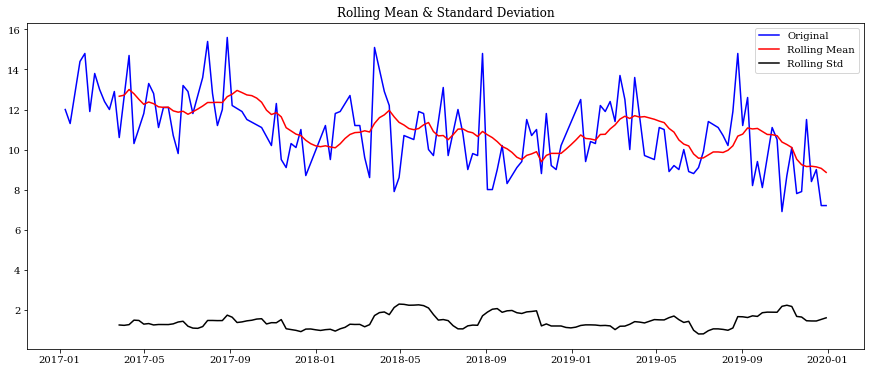

Results of Dickey-Fuller Test:
Test Statistic                 -3.23
p-value                         0.02
#Lags Used                      3.00
Number of Observations Used   152.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [270]:
#ローデータをグラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts, window_size=12)

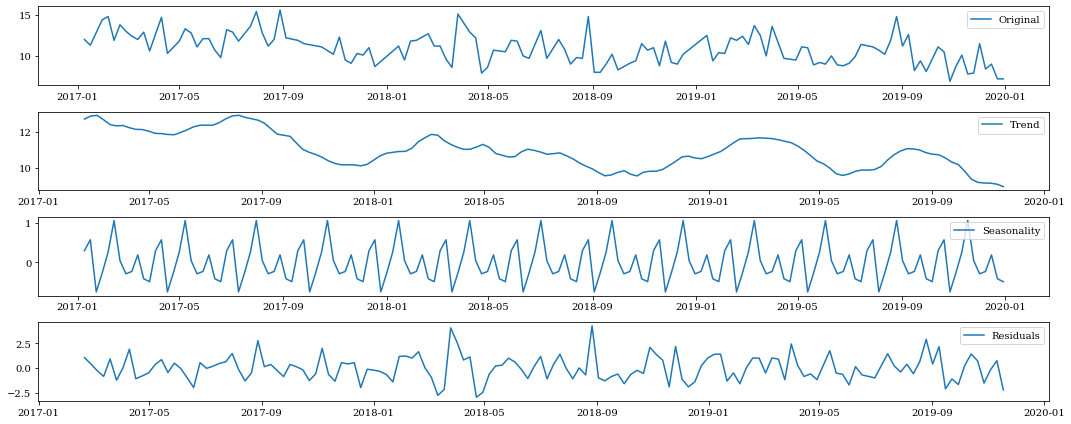

In [271]:
# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("data/output/"+SaveFileName+"_"+bangumi_name+'_トレンド.png')

In [272]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1
                        
# モデルごとの結果確認
#print(modelSelection)
# AIC最小モデル
min_model=modelSelection[modelSelection.aic == min(modelSelection.aic)]
modelname=list(min_model.model)[0]
print("モデルパラメータ",modelname)


import statsmodels.api as sm

p=int(modelname[7])
d=int(modelname[9])
q=int(modelname[11])
sp=int(modelname[-6])
sd=int(modelname[-4])
sq=int(modelname[-2])

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,12), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

モデルパラメータ order=(2,1,3), season=(0,1,1)
                                 Statespace Model Results                                 
Dep. Variable:                            視聴率（修正）   No. Observations:                  156
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -243.399
Date:                            Mon, 30 Mar 2020   AIC                            500.797
Time:                                    01:55:14   BIC                            520.707
Sample:                                01-08-2017   HQIC                           508.886
                                     - 12-29-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0713      0.203     -0.352      0.725      -0.469       0.

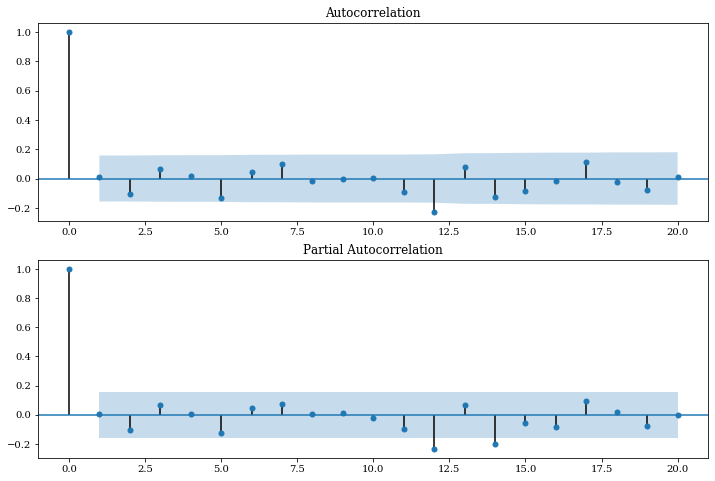

In [273]:
# 残差の自己相関については、ほぼ問題なくなったことを確認

# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=20, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=20, ax=ax2)

In [274]:
# 予測
ts_pred = sarima.predict('2019-09-01', '2020-03-22')

predict_dy = sarima.get_prediction(start ='2019-09-01',end='2020-03-22')
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval


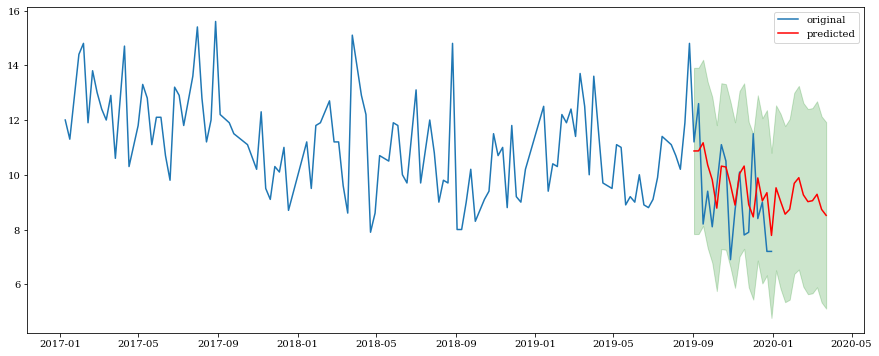

In [275]:
# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts, label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')
plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)

plt.savefig("data/output/"+SaveFileName+"_"+bangumi_name+'_予測結果.png')

In [276]:
#精度評価(9月-11月で)
p=ts_pred["2019-09":"2019-11"]
t=ts["2019-09":"2019-11"]

g=abs(t-p)
r=g/p*100

#RMSE
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(t, p))
rmse=round(rmse,2)
print("RMSE",rmse)

#MAPE
import numpy as np
mape=np.mean(np.abs((p - t) / t)) * 100
mape=round(mape,2)
print("MAPE",mape)


RMSE 1.57
MAPE 14.58


In [277]:
#時刻別OUTPUTファイルの作成
pd.options.display.float_format = '{:.2f}'.format

df3=pd.DataFrame({"予測視聴率":ts_pred, "実際視聴率":t,"誤差":g,"誤差率（%）":r})
df3.index.name = "日付"
df3=df3.reset_index()
df3["局"]=select_TV
df3["レギュラー番組"]=bangumi_name
df3=df3[["局","日付","レギュラー番組","予測視聴率","実際視聴率","誤差","誤差率（%）"]]
df3.to_csv('data/output/'+SaveFileName+"_"+bangumi_name+'.csv',encoding='cp932', index=False)
df3

,局,日付,レギュラー番組,予測視聴率,実際視聴率,誤差,誤差率（%）
0,NTV,2019-09-01 22:10:00,おしゃれイズム,10.87,11.20,0.33,3.04
1,NTV,2019-09-08 22:10:00,おしゃれイズム,10.87,12.60,1.73,15.91
2,NTV,2019-09-15 22:10:00,おしゃれイズム,11.17,8.20,2.97,26.58
3,NTV,2019-09-22 22:10:00,おしゃれイズム,10.36,9.40,0.96,9.25
4,NTV,2019-09-29 22:10:00,おしゃれイズム,9.82,8.10,1.72,17.48
5,NTV,2019-10-06 22:10:00,おしゃれイズム,8.78,9.60,0.82,9.33
6,NTV,2019-10-13 22:10:00,おしゃれイズム,10.32,11.10,0.78,7.60
7,NTV,2019-10-20 22:10:00,おしゃれイズム,10.28,10.50,0.22,2.10
8,NTV,2019-10-27 22:10:00,おしゃれイズム,9.64,6.90,2.74,28.44
9,NTV,2019-11-03 22:10:00,おしゃれイズム,8.89,8.70,0.19,2.17


In [278]:
import csv
#一覧表を作成
filename=SaveFileName+"_"+bangumi_name
with open('data/output/Matome.csv', 'a+',encoding='shift_jis',newline="") as f:
    writer = csv.writer(f)
    writer.writerow([select_TV,select_Week,select_Time,bangumi_name,rmse,mape,modelname,RegularRate1,RegularRate2,filename])
    
matome=pd.read_csv('data/output/matome.csv',encoding="shift-jis")
matome

,局,曜日,時刻,レギュラー番組名,RMSE誤差,MAPE誤差率,SARIMAモデルのパラメータ,期間内レギュラー番組放送率,予測に使うデータのレギュラー番組率,OUTPUTファイル名
0,FTV,月,19:10:00,ネプリーグ,0.7,7.26,"order=(3,1,3), season=(0,1,1)",0.74,0.744,FTV_月1910_ネプリーグ
1,FTV,月,19:40:00,ネプリーグ,0.78,6.05,"order=(3,0,2), season=(0,1,1)",0.74,0.744,FTV_月1940_ネプリーグ
2,FTV,月,20:10:00,痛快ＴＶスカッとジャパン,0.76,6.57,"order=(3,0,3), season=(0,1,1)",0.69,0.703,FTV_月2010_痛快ＴＶスカッとジャパン
3,FTV,月,20:40:00,痛快ＴＶスカッとジャパン,1.14,10.25,"order=(1,0,3), season=(0,1,1)",0.69,0.703,FTV_月2040_痛快ＴＶスカッとジャパン
4,FTV,月,21:10:00,-,-,-,構築不可（ドラマ枠）,0.07,-,-
5,FTV,月,21:40:00,-,-,-,構築不可（ドラマ枠）,0.07,-,-
6,FTV,月,22:10:00,新説！所ＪＡＰＡＮ,0.7,11.48,"order=(2,0,3), season=(0,1,1)",0.24,0.603,FTV_月2210_新説！所ＪＡＰＡＮ
7,FTV,月,22:40:00,新説！所ＪＡＰＡＮ,0.62,11.4,"order=(2,0,3), season=(1,1,1)",0.33,0.81,FTV_月2240_新説！所ＪＡＰＡＮ
8,FTV,火,19:10:00,今夜はナゾトレ,0.78,8.77,"order=(3,0,1), season=(1,0,0)",0.59,0.6,FTV_火1910_今夜はナゾトレ
9,FTV,火,19:40:00,今夜はナゾトレ,0.65,6.12,"order=(2,1,3), season=(0,1,1)",0.59,0.6,FTV_火1940_今夜はナゾトレ


In [279]:
#外れ原因調査

#t=df_ftv_rates["timestamp"]["2019-11-24 20:40:00"]
#result=gpb.loc[(gpb.datetimets<t)&(gpb.endtimets>t)]
#result.drop(columns=["Unnamed: 0","年","月","日","開始時","開始分","datetimets","endtimets"])
